In [104]:
#This ipynb was developed on Google Colab and uses file from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [106]:
parent_folder = "/content/drive/MyDrive/AAIC/Projects/Quora Question Pairs"
filename = "train.csv"
df = pd.read_csv(parent_folder + "/" + filename)

In [107]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


## Basic Feature Extraction


*   **total_words_q1** : number of words in q1
*   **total_words_q2** : number of words in q2
*   **total_unique_words_q1** : number of unique words in q1
*   **total_unique_words_q2** : number of unique words in q2
*   **length_difference** : | number of words in q1 - number of words in q2 |
*   **unique_length_difference** : | number of unique words in q1 - number of unique words in q2 |
*   **common_words_count** : number of common words in q1 and q2
*   **common_words_share** : common_words_count / (total_unique_words_q1 + total_unique_words_q2)



In [109]:
df['total_words_q1'] = df['question1'].apply(lambda row : len(str(row).split()))
df['total_words_q2'] = df['question2'].apply(lambda row : len(str(row).split()))

df['length_difference'] = abs( df['total_words_q1'] - df['total_words_q2'] )

In [110]:
df['total_unique_words_q1'] = df['question1'].apply(lambda row : len(set(str(row).split())))
df['total_unique_words_q2'] = df['question2'].apply(lambda row : len(set(str(row).split())))

df['unique_length_difference'] = abs( df['total_unique_words_q1'] - df['total_unique_words_q2'] )

In [111]:
def get_common_word_count(row):
    q1 = set(map(lambda word : word.lower().strip(), str(row['question1']).split()))
    q2 = set(map(lambda word : word.lower().strip(), str(row['question2']).split()))
    return len(q1 & q2)

df['common_words_count'] = df.apply(get_common_word_count, axis = 1)

In [112]:
df['common_words_share'] = df['common_words_count'] / (df['total_unique_words_q1'] + df['total_unique_words_q2'] )

In [113]:
df.drop(columns=['total_words_q1', 'total_words_q2', 'total_unique_words_q1', 'total_unique_words_q2'], inplace=True)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,length_difference,unique_length_difference,common_words_count,common_words_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,2,1,10,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,5,4,4,0.200000


## Analysing Extracted Features

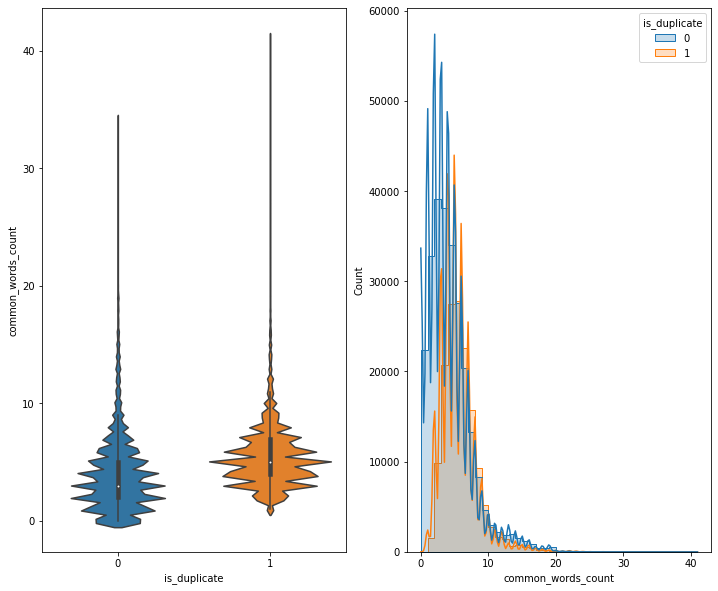

In [114]:
plt.close()
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
sns.violinplot( data=df, x='is_duplicate', y='common_words_count')

plt.subplot(1,2,2)
# sns.histplot(data=df, x='common_words_count', hue='is_duplicate', binwidth=1, kde=True)
# sns.kdeplot(data=df, x='common_words_count', hue='is_duplicate')
sns.histplot(data=df, x='common_words_count', hue='is_duplicate', element='step', binwidth=1, kde=True)

plt.show()

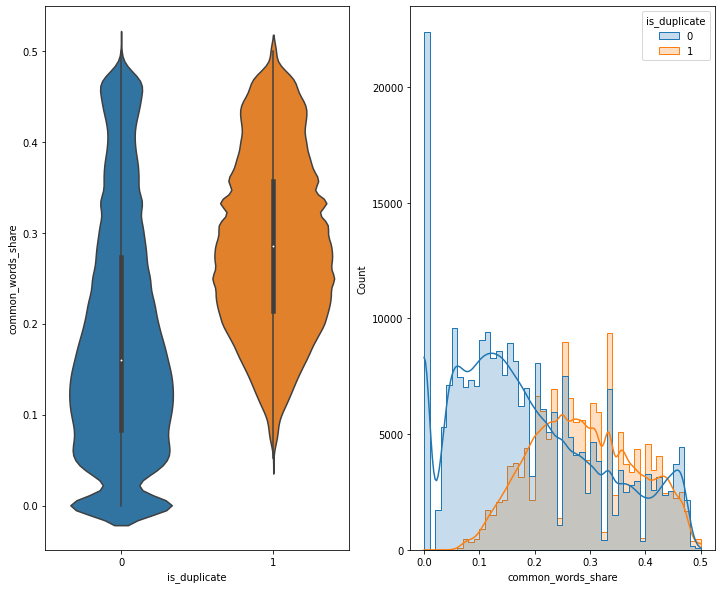

In [115]:
plt.close()
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
sns.violinplot( data=df, x='is_duplicate', y='common_words_share')

plt.subplot(1,2,2)
sns.histplot(data=df, x='common_words_share', hue='is_duplicate', element='step', binwidth=0.01, kde=True)

plt.show()

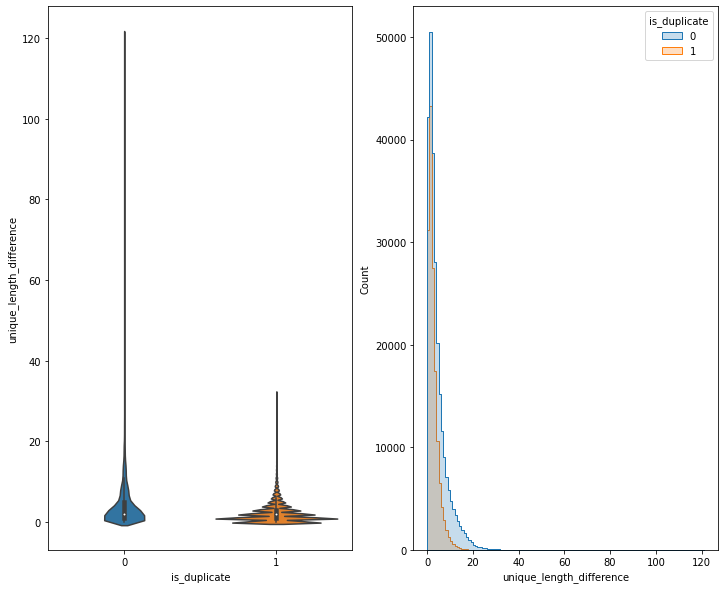

In [116]:
plt.close()
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
sns.violinplot( data=df, x='is_duplicate', y='unique_length_difference')

plt.subplot(1,2,2)
sns.histplot(data=df, x='unique_length_difference', hue='is_duplicate', element='step', binwidth = 1)

plt.show()

## Saving the dataframe

In [117]:
df.to_csv(parent_folder + "/" + "train_fe_1.csv")

## Observations



1.   The pdfs of common_word_count for duplicate and non-duplicate pair overlap alot
2.   The pdfs of common_word_share have some separation. If common_word_share is close to 0, almost always the pair is non-duplicate.
3.   The pdfs unique_length_difference again overlap giving away no clear separation between the classes

